In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# This is Analysis for Superstore 

in this We Aswered this Question? <br>
- Which states bring the most profit (and which lose)? <br>
- What categories/sub-categories sell most?
- What is the return rate per region or segment? <br>
- Are discounts hurting or helping profit? <br>
- Monthly trends — when do sales spike/drop?<br>


In [66]:
df = pd.read_csv("D:\\Sample - Superstore.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [67]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [69]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# WE have to change Order Date  and Ship Date into Date type

# Point to noted
    - Sales can't be Negative (sale >= 0)
    - Quantity should be >= 1
    - discount can be 0 or > 0
    - profit can't be Negative , if negative then it is in loss 
    - No duplicate Rows

In [70]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.drop(columns='Row ID' , inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

# remove Duplicate rows

In [71]:
print('Duplicate Rows before: ',df.duplicated().sum())
print(df.drop_duplicates(inplace = True))
print('Duplicate Rows after: ',df.duplicated().sum())

Duplicate Rows before:  1
None
Duplicate Rows after:  0


# till now what we have done --
    - changed data type of date (object -> datetype)
    - remove duplicate rows
    - drop Row ID
# Now we are moving to Numerical Columns
    - sales >=0
    - qunatity >=1
    - discount >= 0
    - porfit >=0 other wise Loss if negative

In [72]:
df = df[df['Sales']>= 0]
df = df[df['Quantity']>= 1]
df = df[df['Discount']>= 0]


# stores a values that are in loss

In [73]:
loss  = df[df['Profit']<0] 
print(loss.shape[0]) 

1870


# New column for Profit Status Loss or Profit

In [74]:
df['Profit Status'] = df['Profit'].apply(lambda x : "Loss" if x < 0 else'Profit')


In [75]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9993 non-null   object        
 1   Order Date     9993 non-null   datetime64[ns]
 2   Ship Date      9993 non-null   datetime64[ns]
 3   Ship Mode      9993 non-null   object        
 4   Customer ID    9993 non-null   object        
 5   Customer Name  9993 non-null   object        
 6   Segment        9993 non-null   object        
 7   Country        9993 non-null   object        
 8   City           9993 non-null   object        
 9   State          9993 non-null   object        
 10  Postal Code    9993 non-null   int64         
 11  Region         9993 non-null   object        
 12  Product ID     9993 non-null   object        
 13  Category       9993 non-null   object        
 14  Sub-Category   9993 non-null   object        
 15  Product Name   9993 non-nu

In [76]:
print(df.describe())


                          Order Date                      Ship Date  \
count                           9993                           9993   
mean   2016-04-30 01:53:33.089162240  2016-05-04 00:53:19.039327488   
min              2014-01-03 00:00:00            2014-01-07 00:00:00   
25%              2015-05-23 00:00:00            2015-05-27 00:00:00   
50%              2016-06-26 00:00:00            2016-06-29 00:00:00   
75%              2017-05-14 00:00:00            2017-05-18 00:00:00   
max              2017-12-30 00:00:00            2018-01-05 00:00:00   
std                              NaN                            NaN   

        Postal Code         Sales     Quantity     Discount       Profit  
count   9993.000000   9993.000000  9993.000000  9993.000000  9993.000000  
mean   55191.576403    229.852846     3.789753     0.156188    28.660971  
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000  
25%    23223.000000     17.280000     2.000000     0.000000 

In [77]:
import openpyxl 
superstore_cleaned = df.to_excel('Super Store.xlsx',index = False, engine='openpyxl')

# # VISUALIZATION

# Now we are done with cleaning part .
    - Moving to questions
        - Which states bring the most profit (and which lose)? 
        - What categories/sub-categories sell most?
        - Are discounts hurting or helping profit?
        - Monthly trends — when do sales spike/drop?

#  #Which states bring the most profit (and which lose)? 

In [78]:
most_profit_by_state = df[['State', 'Profit']].groupby('State').max() # grouped by state nd return the max profit
top_most_profit_by_state = most_profit_by_state.sort_values(by='Profit',ascending=False).reset_index() # returns the descending table 
top_10_states_by_profit = top_most_profit_by_state.head(10) # stores the top 10 states by profit 
top_10_states_by_profit




,State,Profit
0,Indiana,8399.9760
1,Washington,6719.9808
2,Delaware,5039.9856
3,Michigan,4946.3700
4,Minnesota,4630.4755
5,New York,3919.9888
6,Georgia,3177.4750
7,Virginia,2799.9840
8,Rhode Island,2591.9568
9,New Jersey,2365.9818


C:\Users\daffy\AppData\Local\Temp\ipykernel_15156\3224844219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


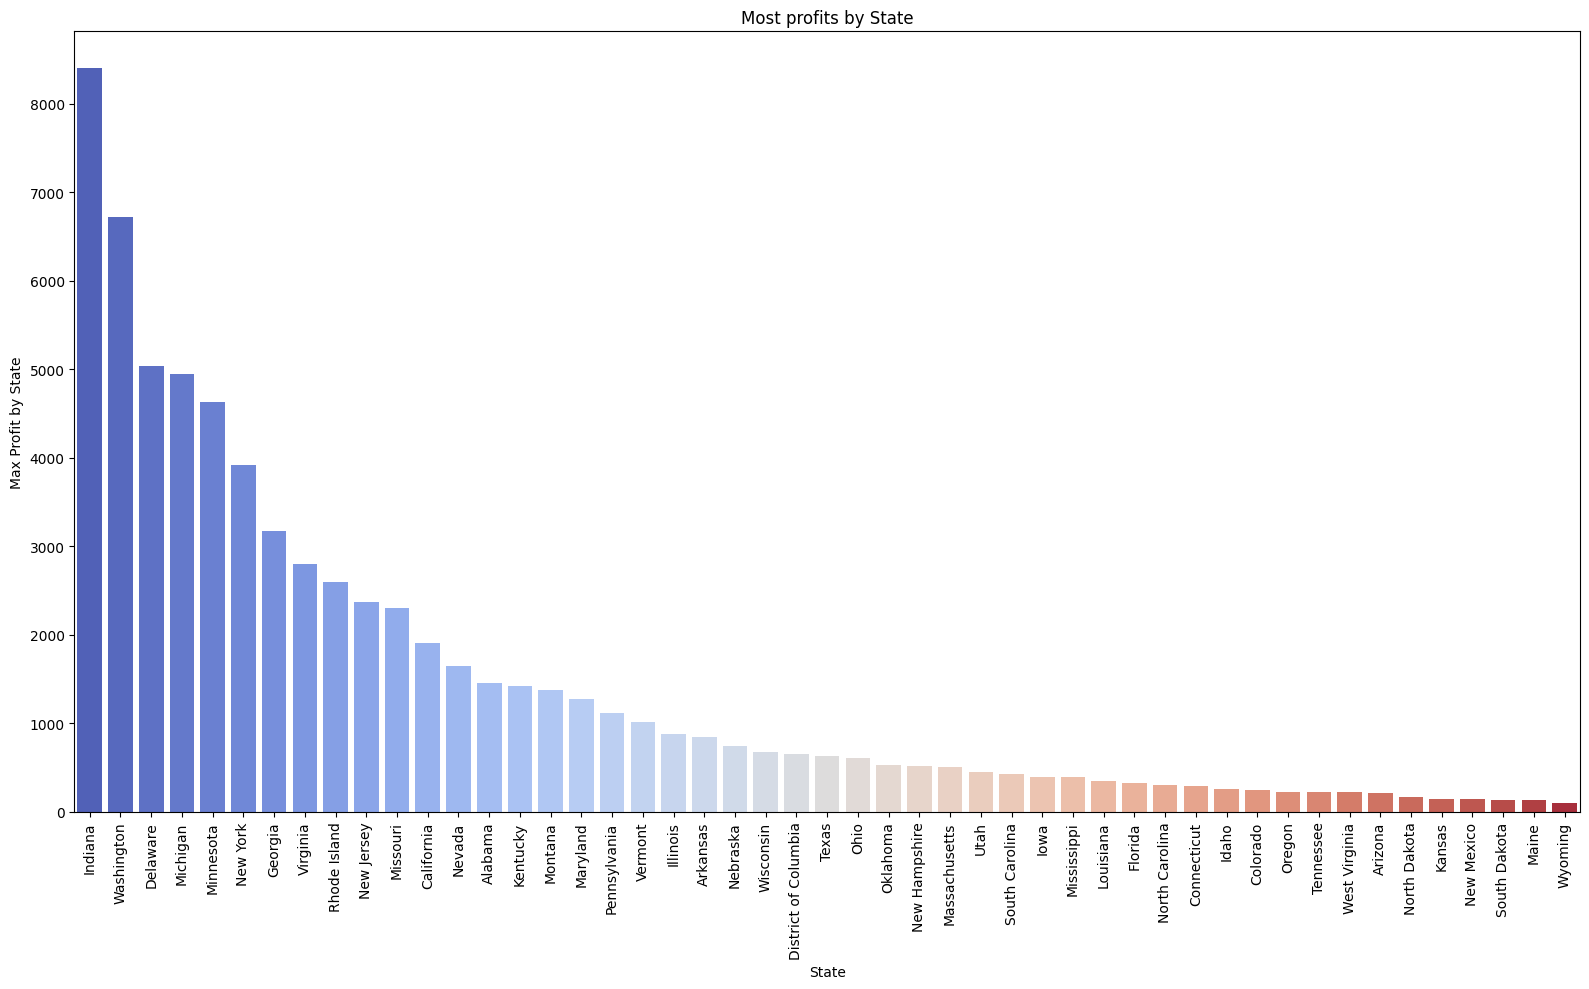

In [79]:
plt.figure(figsize=(16,10))
sns.barplot(
    data=top_most_profit_by_state,
    x='State', y='Profit',
    palette="coolwarm",
  
)
plt.title('Most profits by State')
plt.xlabel('State')
plt.ylabel('Max Profit by State')
plt.xticks(rotation=90)
plt.tight_layout(h_pad=58)
plt.show()

# Above charts says the max profit by state

# Top 10 States that generates Most profit

C:\Users\daffy\AppData\Local\Temp\ipykernel_15156\1610338264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


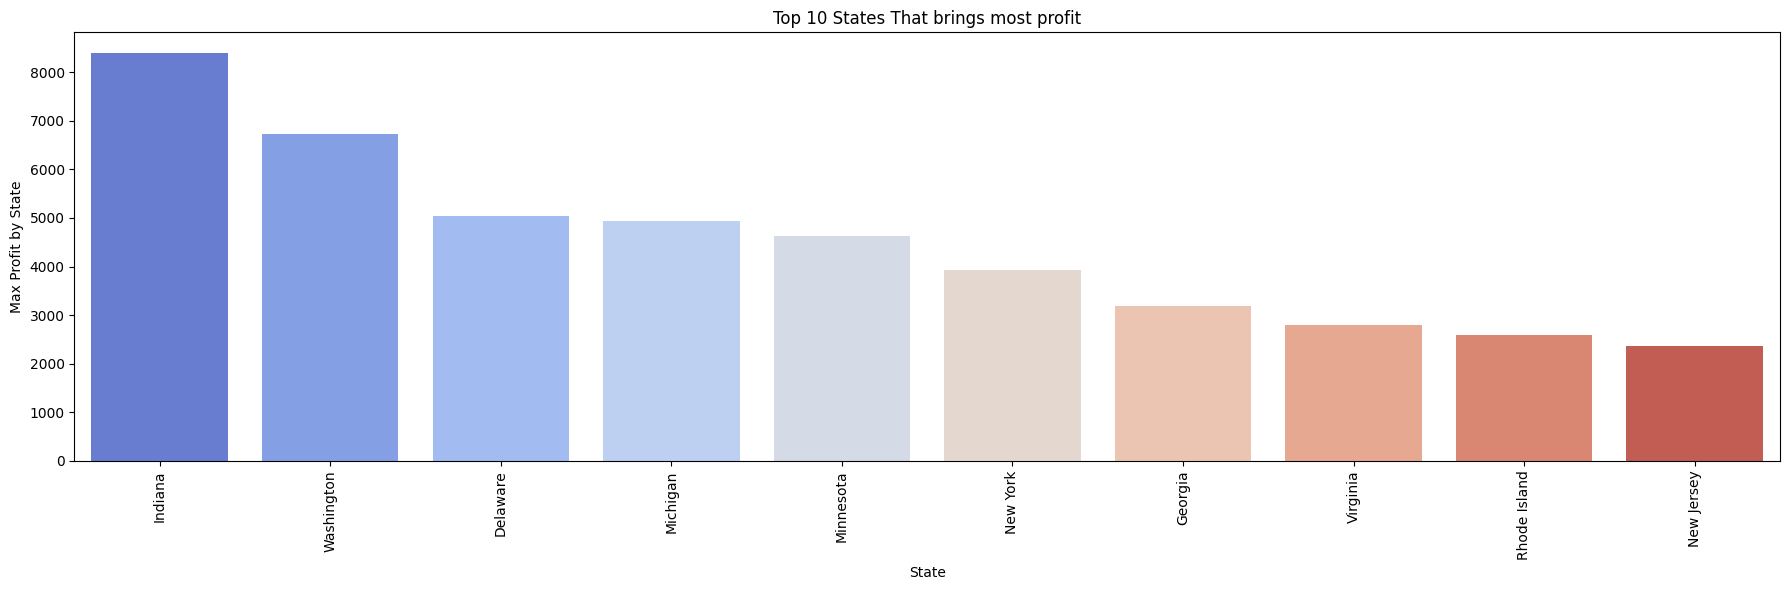

In [80]:
plt.figure(figsize=(18,6))
sns.barplot(
    data=top_10_states_by_profit,
    x='State', y='Profit',
    palette="coolwarm",
  
)
plt.title('Top 10 States That brings most profit')
plt.xlabel('State')
plt.ylabel('Max Profit by State')
plt.xticks(rotation=90)
plt.tight_layout(h_pad=58)
plt.show()

In [81]:
states_with_less_profit = top_most_profit_by_state.tail(10).sort_values(by='Profit',ascending=True)
states_with_less_profit

,State,Profit
48,Wyoming,100.1960
47,Maine,131.3550
46,South Dakota,132.5898
45,New Mexico,138.3552
44,Kansas,149.3820
43,North Dakota,162.0948
42,Arizona,211.4955
41,West Virginia,219.4416
40,Tennessee,223.9936
39,Oregon,228.0792


# 10 States that brings most less Profit

C:\Users\daffy\AppData\Local\Temp\ipykernel_15156\1064170833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


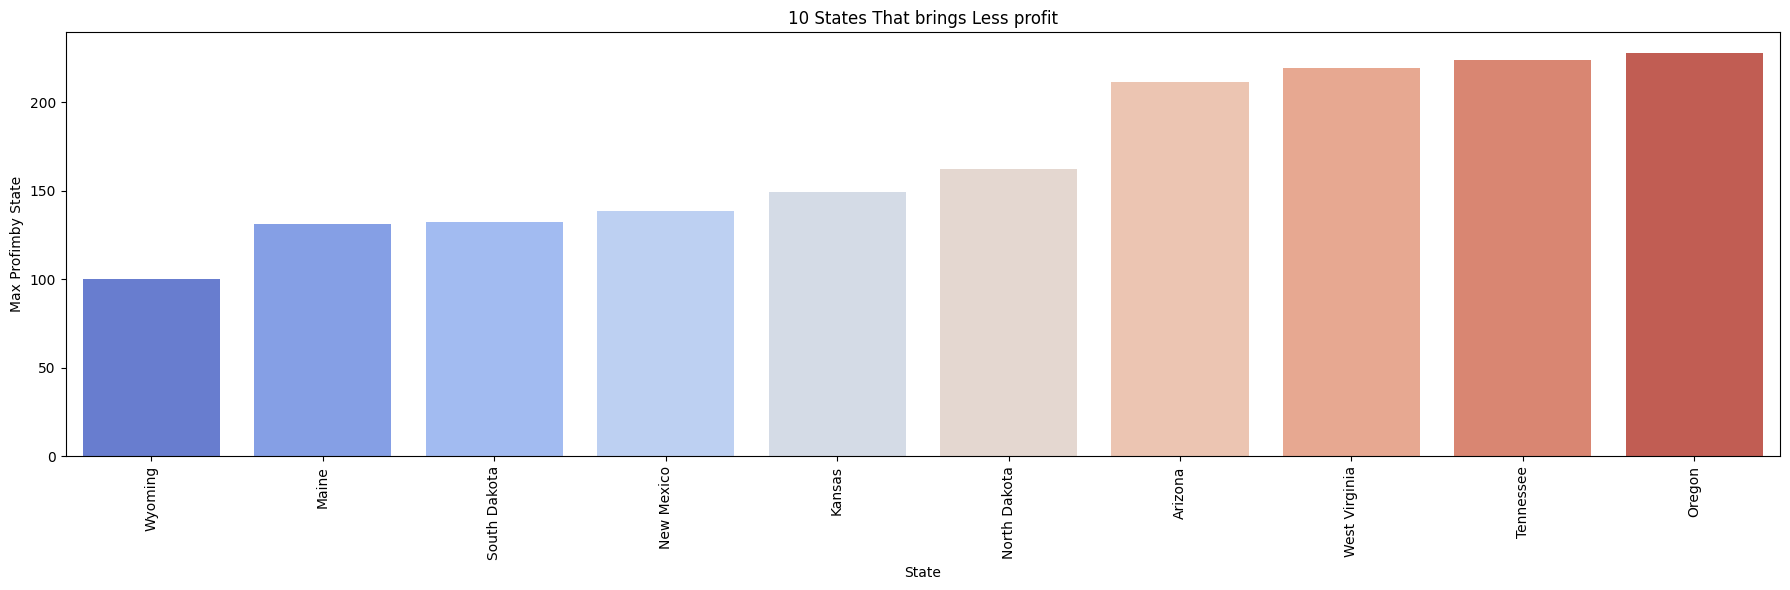

In [82]:
plt.figure(figsize=(18,6))
sns.barplot(
    data= states_with_less_profit,
    x='State', y='Profit',
    palette="coolwarm",
  
)
plt.title('10 States That brings Less profit')
plt.xlabel('State')
plt.ylabel('Max Profimby State')
plt.xticks(rotation=90)
plt.tight_layout(h_pad=58)
plt.show()

In [83]:
most_profit_by_state = df[['State', 'Profit']].groupby('State').sum() # grouped by state nd return the max profit
top_most_profit_by_state = most_profit_by_state.sort_values(by='Profit',ascending=False).reset_index() # returns the descending table 
top_10_states_by_profit = top_most_profit_by_state.head(10) # stores the top 10 states by profit 
top_10_states_by_profit




,State,Profit
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


# this charts says total sum of profit by states

C:\Users\daffy\AppData\Local\Temp\ipykernel_15156\3565150857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


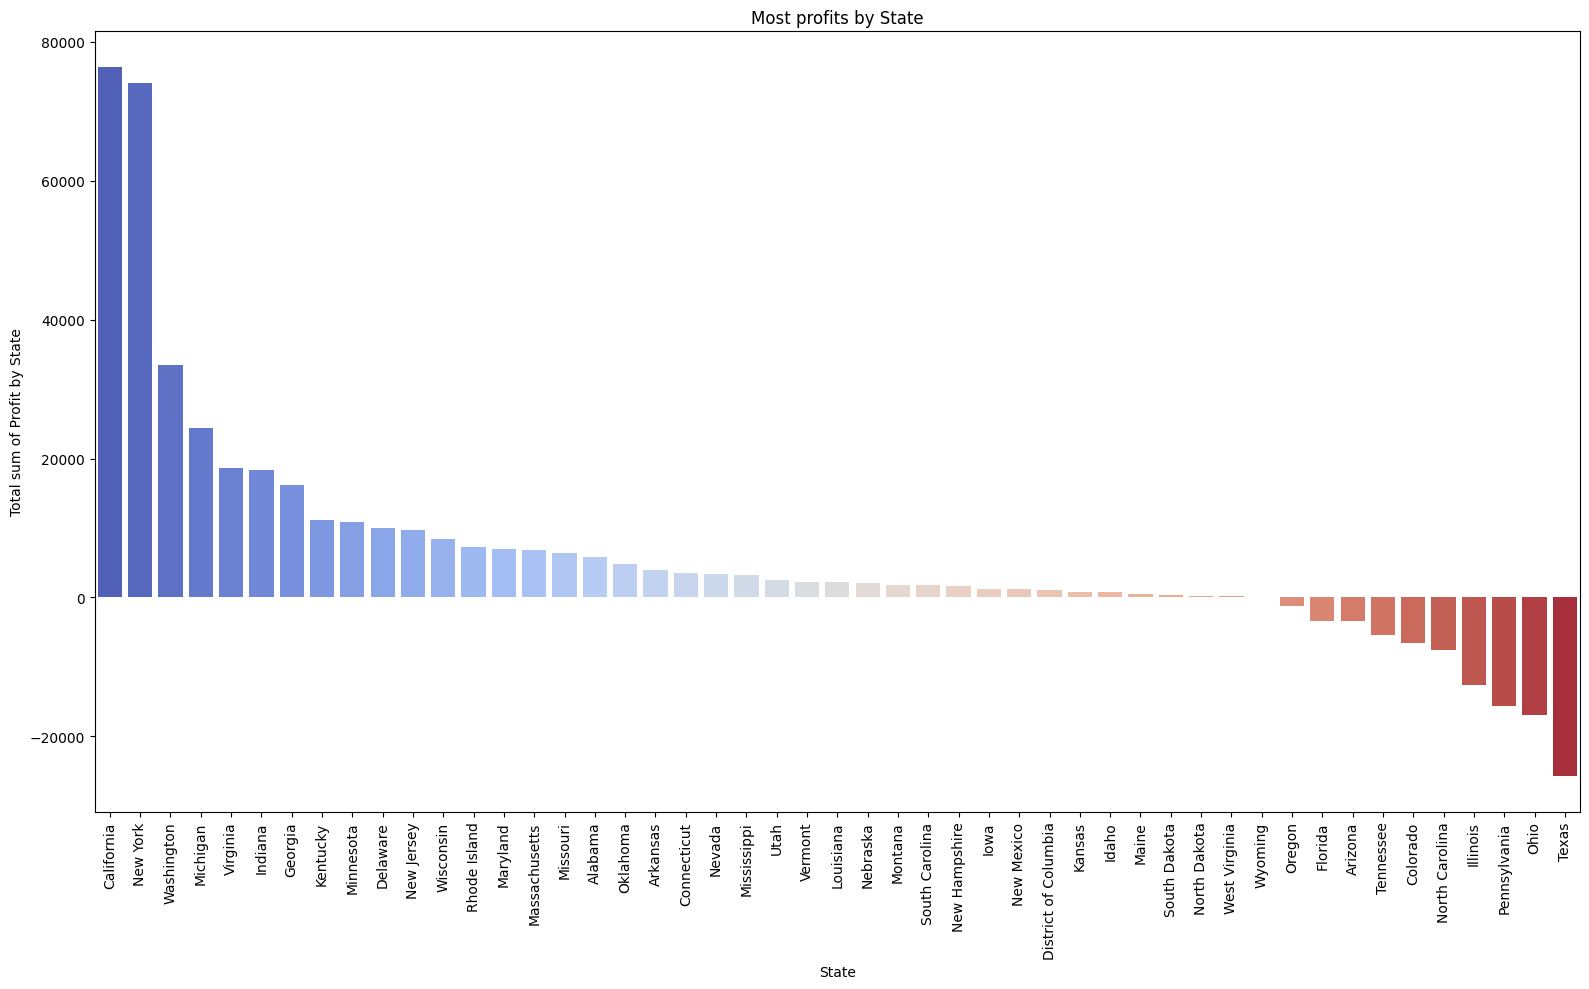

In [84]:
plt.figure(figsize=(16,10))
sns.barplot(
    data=top_most_profit_by_state,
    x='State', y='Profit',
    palette="coolwarm",
  
)
plt.title('Most profits by State')
plt.xlabel('State')
plt.ylabel('Total sum of Profit by State')
plt.xticks(rotation=90)
plt.tight_layout(h_pad=58)
plt.show()

# #What categories/sub-categories sell most?

In [85]:
print(df['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [86]:
category_df = df[['Category', 'Sub-Category','Quantity']].groupby(['Category','Sub-Category']).sum().reset_index()
category_df 

,Category,Sub-Category,Quantity
0,Furniture,Bookcases,868
1,Furniture,Chairs,2354
2,Furniture,Furnishings,3563
3,Furniture,Tables,1241
4,Office Supplies,Appliances,1729
5,Office Supplies,Art,3000
6,Office Supplies,Binders,5974
7,Office Supplies,Envelopes,906
8,Office Supplies,Fasteners,914
9,Office Supplies,Labels,1400


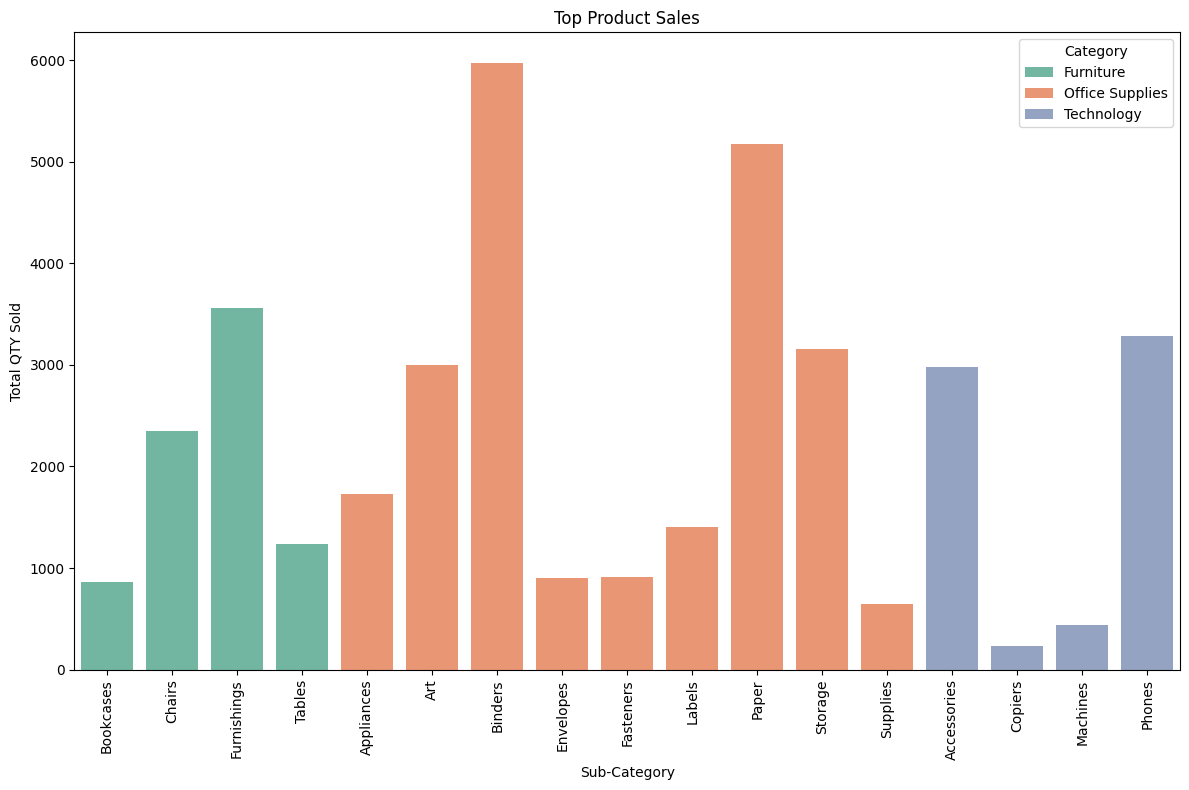

In [87]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=category_df, x= "Sub-Category",y="Quantity",
    hue="Category",
    palette="Set2"

)
plt.title('Top Product Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Total QTY Sold')
plt.xticks(rotation=90)
plt.tight_layout(h_pad=2)
plt.show()

# #Are discounts hurting or helping profit?

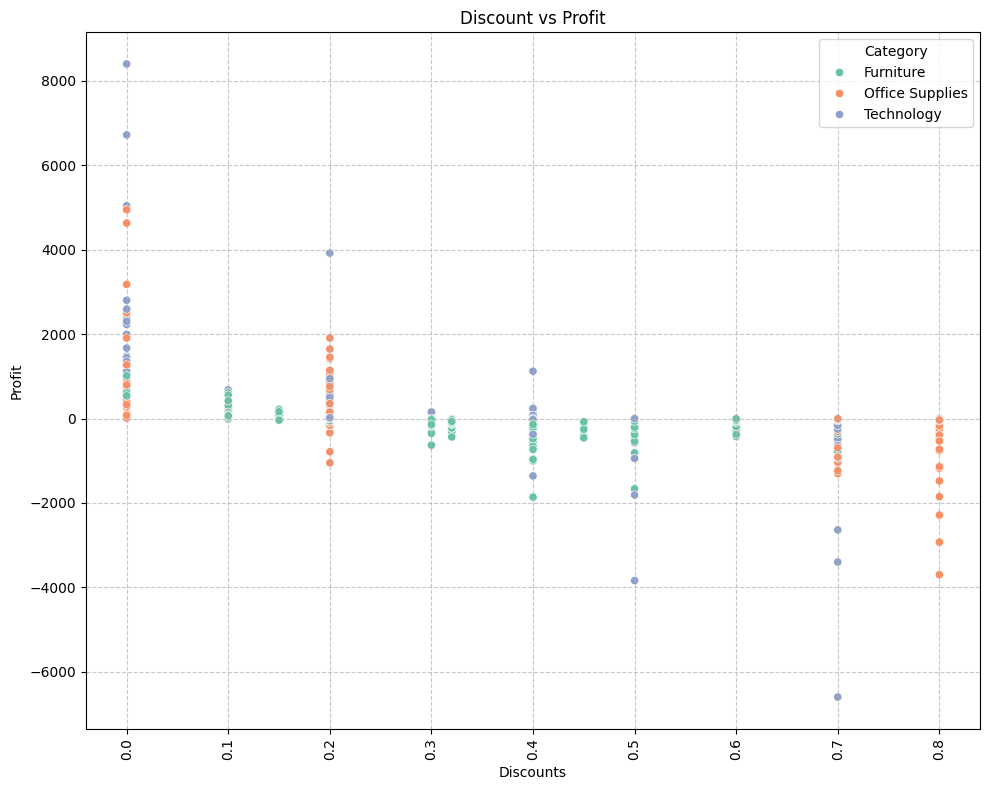

In [88]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data= df, x= "Discount",y="Profit",
    palette="Set2",
    hue='Category'

)
plt.title('Discount vs Profit')
plt.xlabel('Discounts')
plt.ylabel('Profit')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# #Monthly trends — when do sales spike/drop?

In [89]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.strftime('%B')
df['Years'] = df['Order Date'].dt.strftime('%Y')
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']



In [90]:
monthly_sales = df.groupby('Month Name')['Sales'].sum().reindex(month_order).reset_index()
monthly_sales

,Month Name,Sales
0,January,94924.8356
1,February,59751.2514
2,March,205005.4888
3,April,137480.7566
4,May,155028.8117
5,June,152718.6793
6,July,147238.0970
7,August,159044.0630
8,September,307649.9457
9,October,200322.9847


C:\Users\daffy\AppData\Local\Temp\ipykernel_15156\887232904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


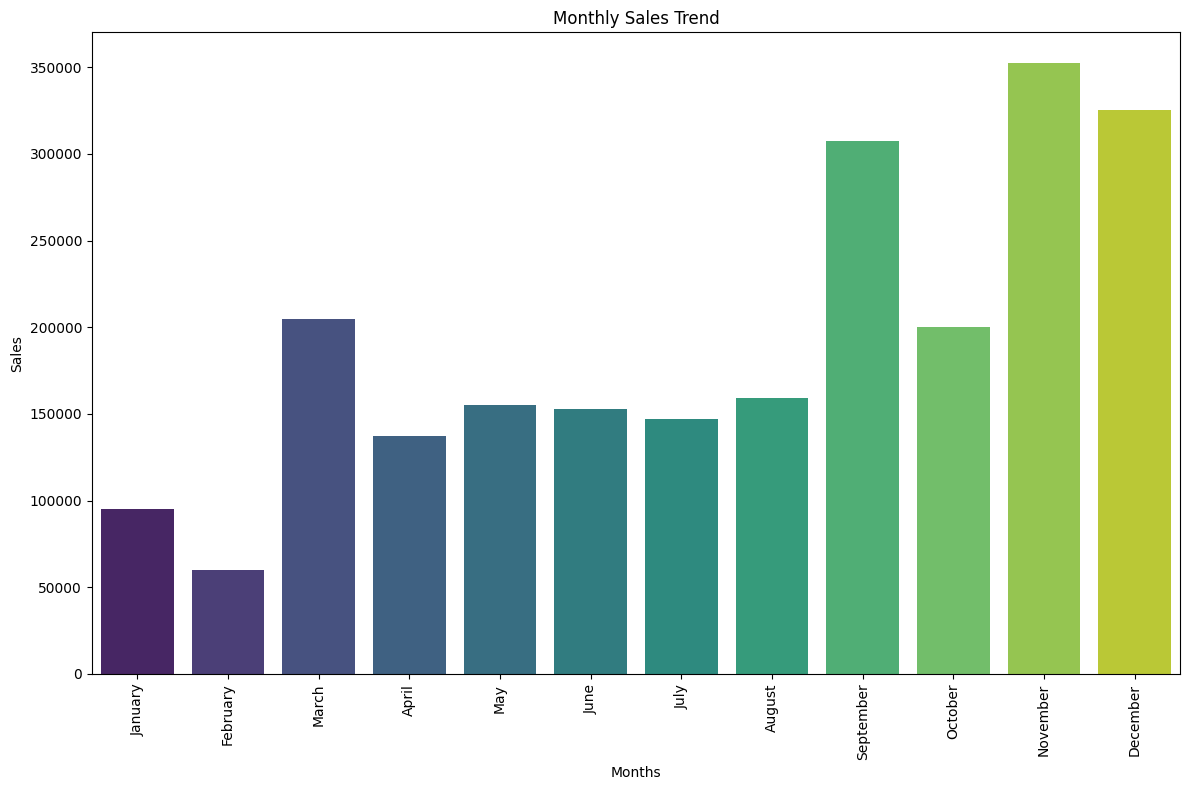

In [91]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=monthly_sales, x= "Month Name",y="Sales",
    palette="viridis"

)
plt.title('Monthly Sales Trend')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.tight_layout(h_pad=2)
plt.show()

In [92]:
m_y_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index().sort_values('Year', ascending=True)
m_y_sales

,Year,Month,Sales
0,2014,1,14236.8950
1,2014,2,4519.8920
2,2014,3,55691.0090
3,2014,4,28013.9730
4,2014,5,23648.2870
5,2014,6,34595.1276
6,2014,7,33946.3930
7,2014,8,27909.4685
8,2014,9,81777.3508
9,2014,10,31453.3930


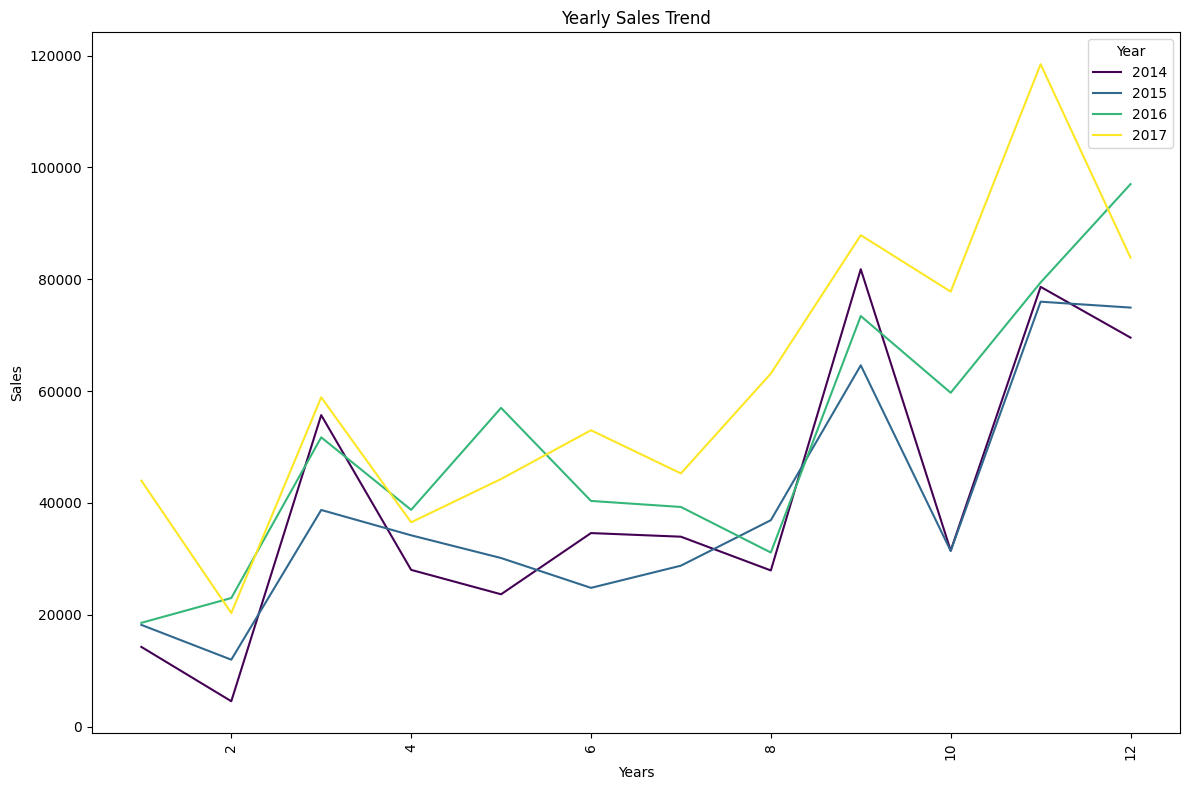

In [93]:
plt.figure(figsize=(12,8))
sns.lineplot(
    data=m_y_sales, x= "Month",y="Sales",
    palette="viridis",
    hue= 'Year'

)
plt.title('Yearly Sales Trend')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.tight_layout(h_pad=2)
plt.show()